# Predicting Car Prices Using K-Nearest Neighbors Algorithm

This project is a part of the guided project from Dataquest. I also develop and do further data analysis on my own using different techniques to split a dataset into training and test sets, and applying k-nearest neighbors algorithm with different k values to predict the car prices. The dataset used in this project is from https://archive.ics.uci.edu/ml/datasets/automobile. 

The outlines of this notebook presentation is as follows:
1. Data Exploration
2. Data Cleaning
3. Splitting Data Method 1: shuffle the dataset before splitting using numpy.random.permutation
    3.1 Univariate Model: using one feature in our model.
    3.2 Multivariate Model: using multiple features in each model and compare the results by calculating the root-mean-squre error (RMSE).
    3.3 Hyperparameter Tuning: varying k values in k-nearest neighbors and compare the results using the RMSEs of individual models.
4. Splitting Data Method 2: K-Fold Validation
    - comparing the results from this part to Method 1's solutions where we split the shuffled dataset into training and test sets.

## Data Exploration

In [314]:
import pandas as pd
import numpy as np

In [315]:
# import the data and add column names
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
           'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
           'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
           'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=columns)

In [316]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [317]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Observations:
- There is one column containing null value, which is normalized-losses. The symbol of null is "?".
- Numerical columns are symboling, wheel-base, length, width, height, curb-weight, engine-size, compression-rate, city-mpg and highway-mpg.
- Note that normalized-losses, bore, stroke, hoursepower, peak-rmp and price columns are not numerical types, and we have to transform these columns to float for further analysis.
- Or you can check for the continuous data columns from https://archive.ics.uci.edu/ml/datasets/automobile .
- What can be our prediction model features?
    - All the continuous data columns, which are normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-rate, horsepower, peak-rp, city-mpg and highway-mpg.

## Data Cleaning

In [318]:
# we only select the columns with continous values and recreate the dataframe
selected_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                    'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_df = cars[selected_columns]
cars_df.head()


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [319]:
cars_df = cars_df.replace('?',np.nan)
cars_df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [320]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


There are normalized-losses, bore, stroke, hoursepower, peak-rpm and price that have to be converted to either integer or float. Since we do not want to round up the values of bore and stroke and to make it short and easy, we will converted all the column types to float.

In [321]:
# convert the dtype of all the columns
cars_df = cars_df.astype(float)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [322]:
# check null values
cars_df.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There are 4 rows of price column that are null. Since we would like to predict the price, we will remove these 4 rows.

In [323]:
cars_df = cars_df.dropna(subset=['price'])
cars_df.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For the other null values in the other columns, we will replace them with mean values of each column.

In [324]:
cars_df = cars_df.fillna(cars_df.mean())
cars_df.isnull().sum() #check if there is any null value left.

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Next, we will normalize all the column, except the price column (the column that we want to predict or a target column). The values of the other columns or feature columns will range from 0 - 1.

In [325]:
price = cars_df['price']
normalized_cars = (cars_df - cars_df.min())/(cars_df.max() - cars_df.min())
normalized_cars['price'] = price
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Splitting Data Method 1: Shuffle the Data Before Splitting

### Univariate Model

In [326]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_col, df):
    model = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize indexes
    shuffled_ind = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_ind)
    
    # Find the index that will be used to divide the training and test sets
    transition_index = len(random_df)//2
    
    # Define training and test sets
    train = random_df.iloc[0:transition_index]
    test = random_df.iloc[transition_index:]
    
    # Fit the model
    model.fit(train[[training_col]], train[target_col])
    
    # Predict the prices
    predicted_prices = model.predict(test[[training_col]])
    
    # Validate the result by calculating RMSE
    mse = mean_squared_error(test[target_col], predicted_prices)
    return np.sqrt(mse)

In [328]:
training_col = normalized_cars.columns.drop('price')
features_rmses = {}

for c in training_col:
    features_rmses[c] = knn_train_test(c, 'price', normalized_cars)

features_rmse_series = pd.Series(features_rmses)
features_rmse_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The smaller RMSEs of individual columns shown above suggest that these columns are better features for our feature model.

Previously, we fixed k value to the default value which is 5. Next, we will try to vary k values.

In [329]:
# Update the knn_train_test function to take different k values
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
    
    # Randomize indexes
    shuffled_ind = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_ind)
    
    # Find the index that will be used to divide the training and test sets
    transition_index = len(random_df)//2
    
    # Define training and test sets
    train = random_df.iloc[0:transition_index]
    test = random_df.iloc[transition_index:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        
        # Instantiate the model
        model = KNeighborsRegressor(n_neighbors=k)

        # Fit the model
        model.fit(train[[training_col]], train[target_col])

        # Predict the prices
        predicted_prices = model.predict(test[[training_col]])

        # Validate the result by calculating RMSE and put the value in the created dictionary
        mse = mean_squared_error(test[target_col], predicted_prices)
        k_rmses[k] = np.sqrt(mse)
        
    return k_rmses

In [330]:
training_col = normalized_cars.columns.drop('price')
features_k_rmses = {}

for c in training_col:
    features_k_rmses[c] = knn_train_test(c, 'price', normalized_cars)

features_k_rmses

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


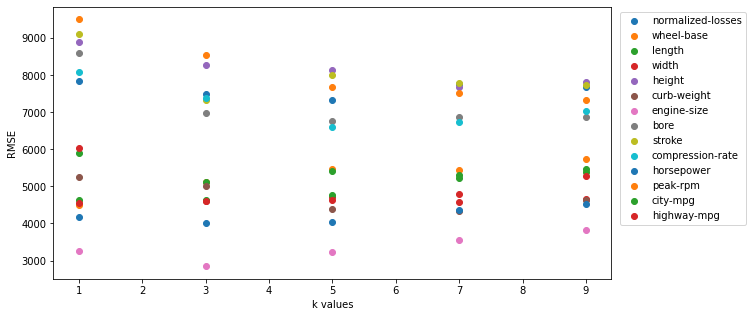

In [331]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

# Extract the value from the rmse dictionary
plt.figure(figsize=(10,5))
for col, sub_dict in features_k_rmses.items():
    X = list(sub_dict.keys())
    Y = list(sub_dict.values())
    plt.scatter(X, Y)
    plt.legend(training_col, bbox_to_anchor=(1.25, 1), loc='upper right', ncol=1)

plt.xlabel('k values')
plt.ylabel('RMSE')
plt.show()

Overall, engine-size and horse power seem to be the best two features for our model. Next, we will combine the features creating more models.

### Multivariate Model

Rank the features from best to worst based on their RMSEs. In this case, we will first set k as a default (n_neighbors = 5).

In [332]:
features_avg_rmse = {}

for col, sub_dict in features_k_rmses.items():
    rmses = list(sub_dict.values())
    features_avg_rmse[col] = np.mean(rmses)

features_avg_rmse_series = pd.Series(features_avg_rmse)
features = features_avg_rmse_series.sort_values()
features

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

Then, we will put these features together and form new models.

In [333]:
# Update the knn_train_test function to build multivariate model (taking multiple features)
def knn_train_test(training_cols, target_col, df):
    model = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize indexes
    shuffled_ind = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_ind)
    
    # Find the index that will be used to divide the training and test sets
    transition_index = len(random_df)//2
    
    # Define training and test sets
    train = random_df.iloc[0:transition_index]
    test = random_df.iloc[transition_index:]
    
    # Fit the model
    model.fit(train[training_cols], train[target_col])
    
    # Predict the prices
    predicted_prices = model.predict(test[training_cols])
    
    # Validate the result by calculating RMSE
    mse = mean_squared_error(test[target_col], predicted_prices)
    return np.sqrt(mse)

In [334]:
feature_combinations_rmse = {}

for i in range(2,7):
    feature_cols = features.index
    training_cols = feature_cols[:i]
    feature_combinations_rmse[i] = knn_train_test(training_cols, 'price', normalized_cars)

feature_combinations_rmse

{2: 2949.8817277180374,
 3: 3580.7376651928435,
 4: 3487.340917327035,
 5: 3410.2170133901805,
 6: 3478.510890118539}

- Note that the numbers of feature combinations shown above mean ...
    - 2: top two features combined together -- ['engine-size', 'horsepower'] called model 1
    - 3: top three features combined together -- ['engine-size', 'horsepower', 'width'] called model 2
    - 4: top four features combined together -- ['engine-size', 'horsepower', 'width', 'curb-weight'] called model 3
    - 5: top five features combined together -- ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg'] called model 4
- The combination of 2 best features (engine-size and horsepower) gives us the lowest RMSE.

Next, let's try to change k values! We will set k to be in a range of 1 - 25.

### Hyperparameter Tuning


In [335]:
def knn_train_test(training_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize indexes
    shuffled_ind = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_ind)
    
    # Find the index that will be used to divide the training and test sets
    transition_index = len(random_df)//2
    
    # Define training and test sets
    train = random_df.iloc[0:transition_index]
    test = random_df.iloc[transition_index:]
    
    k_values = np.arange(1,26)
    k_rmses = {}
    
    for k in k_values:
        
        # Initiate the model
        model = KNeighborsRegressor(n_neighbors=k)

        # Fit the model
        model.fit(train[training_cols], train[target_col])

        # Predict the prices
        predicted_prices = model.predict(test[training_cols])

        # Validate the result by calculating RMSE and put the value in the created dictionary
        mse = mean_squared_error(test[target_col], predicted_prices)
        k_rmses[k] = np.sqrt(mse)
        
    return k_rmses

In [336]:
f_combinations_k_rmses = {}

for i in range(2,7):
    feature_cols = features.index
    training_cols = feature_cols[:i]
    f_combinations_k_rmses[i] = knn_train_test(training_cols, 'price', normalized_cars)

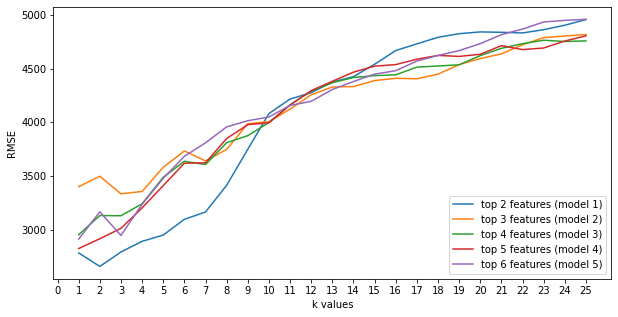

In [337]:
# Extract the value from the rmse dictionary above
plt.figure(figsize=(10,5))
for col, sub_dict in f_combinations_k_rmses.items():
    X = list(sub_dict.keys())
    Y = list(sub_dict.values())
    plt.plot(X, Y,label = "top {} features (model {})".format(col, col-1))
plt.legend(loc='lower right')
plt.xlabel('k values')
plt.ylabel('RMSE')
plt.xticks(np.arange(0, 26, step=1))
plt.show()

#### Findings:

- We found different optimal k values for different models. This is possibly because of the addition of the new features. 
- Overall, the model 1 with k value = 2 performs best and provides the lowest RMSE.

## Splitting Data Method 2: K-Fold Cross Validation


First, let's try setting 2 folds for K-Fold Validation technique, which means splitting the dataset into 2 folds. This is quite similar to what we did previously in Method 1 that we splitted the shuffled data into train and test sets. However, K-Fold validation will not only split the data to 2 folds of train and test sets, but this technique will also switches train and test sets after fitting the model and returning the predicted values, and then recalculate the RMSE. By assigning 2 folds, we will get 2 RMSEs, unlike the previous method (Method 1) that we only get 1 value of RMSE.


In [338]:
# Update knn_train_test using KFold and implementing cross_val from sklearn 
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(training_cols, target_col, df):
    
    # Instantiate the k-fold class
    kf = KFold(2, shuffle=True, random_state=1)
    
    # Assign k values in k-nearest neighbors
    k_values = np.arange(1,26)
    k_rmses = {}
    
    for k in k_values:
        
        # Instantiate the model
        model = KNeighborsRegressor(n_neighbors=k)

        # Implement cross_val_score
        mse = cross_val_score(model, df[training_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        k_rmses[k] = np.mean(np.sqrt(np.abs(mse)))
        
    return k_rmses


In [339]:
five_kfold_rmses = {}

for i in range(2,7):
    feature_cols = features.index
    training_cols = feature_cols[:i]
    five_kfold_rmses[i] = knn_train_test(training_cols, 'price', normalized_cars)
    

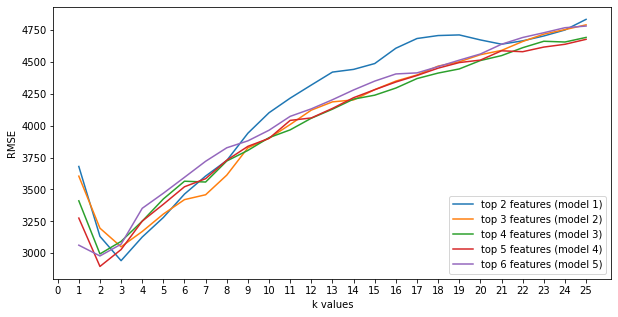

In [340]:
plt.figure(figsize=(10,5))
for col, sub_dict in five_kfold_rmses.items():
    X = list(sub_dict.keys())
    x.append(X)
    Y = list(sub_dict.values())
        
    plt.plot(X, Y, label = "top {} features (model {})".format(col, col-1))
    plt.legend(loc='lower right')

plt.xlabel('k values')
plt.ylabel('RMSE')
plt.xticks(np.arange(0, 26, step=1))
plt.show()


### Findings:

- By applying k-fold validation and setting fold number equal to 2, we get different result from the previous one. In this case, the model 5 with k value equal to 2 performs best giving the lowest RMSE.
- Overall, this finding suggests that the techniques that we use to split the training and test sets do affect the results, and we should keep that in mind when we set up the model and do the analysis. 


Next, let's change fold numbers in k-fold validation. The goal of doing this is to see how changing the fold numbers will affect the performance of our model. To simplify this method, let's assign the k value to 2 and use model 5 as we observe that this model is the 'best' one so far.

In [359]:
# Update knn_train_test to vary fold numbers in k-fold validation
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(training_cols, target_col, df):
    
    kf_rmses = {}
    for kfd in range(2,21):
        # Instantiate the k-fold class
        kf = KFold(kfd, shuffle=True, random_state=1)

        # Instantiate the model
        model = KNeighborsRegressor(n_neighbors=2)

        # Implement cross_val_score
        mse = cross_val_score(model, df[training_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmse = np.mean(np.sqrt(np.abs(mse)))
        kf_rmses[kfd] = rmse

    return kf_rmses


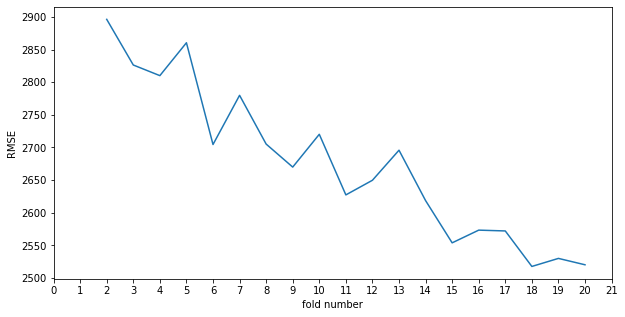

In [360]:
feature_cols = features.index
training_cols = feature_cols[:7]
model5_rmse = knn_train_test(training_cols, 'price', normalized_cars)
fs = []
rmses = []
for f, rmse in model5_rmse.items():
    fs.append(f)
    rmses.append(rmse)

plt.figure(figsize=(10,5))    
plt.plot(fs, rmses)
plt.xlabel('fold number')
plt.ylabel('RMSE')
plt.xticks(np.arange(0, 22, step=1))
plt.show()


### Findings:

- We observe that as the fold number increases, the RMSE does not linearly decrease. Thus, dividing the datasets to higher number of folds does not mean you will get lower RMSE.
- One more thing to keep in mind that when we divide the dataset to many folds, i.e. above 10 folds, the number of rows in the test set will decrease. The typical number of the data in the test set is around 20 - 25% of the total amount of the dataset. Note that the default fold number in KFold Class in sklearn is 5 folds. However, in this study, we can see that 6 folds seem to be better than 5 folds and if using the fold number above 6 folds, our test set will become too small since we only have 201 rows in our dataset. Thus, to prevent overfitting and too small number of test set 6 folds for KFold method seems to be a good number to use in this case. 


## Summary

- The data splitting methods do affect the performance of the models. 
- For the first method, the model 1 with k value equal to 2 seems to be the 'best' model providing the lowest RMSE.
- For the second method, the model 5 with k value equal to 2 and 6-fold validation seems to be a good and reasonable solution providing relatively low RMSE.
- Note that in this study we only use RMSE as an assessment of the models. However, only considering lower RMSEs does not always tell us that a model is the best, we have to consider other factor, i.e. bias and overfitting, as well.